In [195]:
import matplotlib.pyplot as plt

In [201]:
import os
import ciso8601
import numpy as np
folder="../outs-time-w2-centos-phys/"
dumps = os.listdir(folder)
timestamps = []
durations = []
reals = []
users = []
page_faults = []
l1_loads = []
l1_misses = []
llc_loads = []
llc_misses = []
window_width = 60
for dump in sorted(dumps)[:-1]:#[2000:2500]:
    timestamp = (ciso8601.parse_datetime(dump[5:]))
    #if timestamp < ciso8601.parse_datetime('2025-04-13T01:40:32,391751399+02:00'):
    #    continue
    #if timestamp < ciso8601.parse_datetime('2025-04-13T04:40:32,391751399+02:00'):
    #    continue
    with open(f"{folder}/{dump}", "r") as f:
        lines = f.readlines()
    vol_ctxt = int(next(line for line in lines if "Voluntary ctxt switches" in line).split()[4])
    #if vol_ctxt != 0:
    #    continue
    timestamps.append(timestamp)
    duration = next(line for line in lines if line.startswith("BWRAP-STDOUT: Duration"))
    durations.append(float(duration.split()[2]))
    
    real = next(line for line in lines if line.startswith("BWRAP-STDERR: real"))
    reals.append(float(real.split()[2][2:][:-1]))
    user = next(line for line in lines if line.startswith("BWRAP-STDERR: user"))
    users.append(float(user.split()[2][2:][:-1]))
    page_fault = next(line for line in lines if "page-faults:u" in line)
    page_faults.append(float(page_fault.split()[1]))
    l1_load = next(line for line in lines if "L1-dcache-loads:u" in line)
    l1_loads.append(float(l1_load.split()[1]))
    l1_miss = next(line for line in lines if "L1-dcache-load-misses:u" in line)
    l1_misses.append(float(l1_miss.split()[1]))
    llc_load = next(line for line in lines if "LLC-loads:u" in line)
    llc_loads.append(float(llc_load.split()[1]))
    llc_miss = next(line for line in lines if "LLC-load-misses:u" in line)
    llc_misses.append(float(llc_miss.split()[1]))
    
    
# reals = window_width * np.random.normal(np.mean(reals), np.std(reals) * window_width**0.5, (len(reals),))
print(len(timestamps))
print(timestamps[:5])
print(durations[:5])
print(reals[:5])
print(users[:5])
print(page_faults[:5])
print(l1_loads[:5])
print(l1_misses[:5])
print(llc_loads[:5])
print(llc_misses[:5])
    

11486
[datetime.datetime(2025, 4, 15, 21, 8, 16, 413966, tzinfo=UTC+02:00), datetime.datetime(2025, 4, 15, 21, 8, 21, 417910, tzinfo=UTC+02:00), datetime.datetime(2025, 4, 15, 21, 8, 25, 925066, tzinfo=UTC+02:00), datetime.datetime(2025, 4, 15, 21, 8, 30, 428909, tzinfo=UTC+02:00), datetime.datetime(2025, 4, 15, 21, 8, 34, 933941, tzinfo=UTC+02:00)]
[2.83764, 2.83304, 2.83633, 2.83294, 2.83561]
[3.409, 3.211, 3.211, 3.214, 3.221]
[3.197, 3.192, 3.196, 3.193, 3.195]
[231.0, 231.0, 231.0, 231.0, 231.0]
[1451901706.0, 1451901694.0, 1451901696.0, 1451901700.0, 1451901690.0]
[339426088.0, 339526082.0, 339476139.0, 339453459.0, 339501341.0]
[26209628.0, 26184779.0, 26172682.0, 26196383.0, 26175619.0]
[20785941.0, 20772138.0, 20771787.0, 20779979.0, 20769620.0]


In [197]:
def fixup(arr):
    return np.array(arr) / np.exp(np.log(arr).mean())
# print(np.exp(np.log(durations).mean()))
durations = fixup(durations)
reals = fixup(reals)
users = fixup(users)
page_faults = fixup(page_faults)
l1_misses = fixup(l1_misses)
# l1_misses = fixup(np.array(l1_misses) / np.array(l1_loads))
l1_loads = fixup(l1_loads)
llc_misses = fixup(llc_misses)
# llc_misses = fixup(np.array(llc_misses) / np.array(llc_loads))
llc_loads = fixup(llc_loads)
llc_loads_r20 = llc_loads**(1/20)

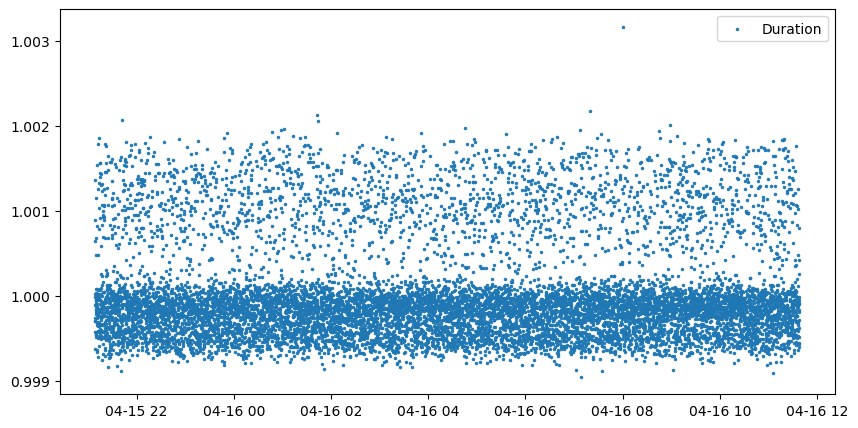

1.0041291662545742


In [187]:
plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()

#ax.axhline(y=0, color="black", linestyle="--")
#ax.axhline(y=0.5, color="black", linestyle=":")
#ax.axhline(y=1.0, color="black", linestyle="--")
#ax.axvline(color="grey")
import numpy as np
#ax.axline((0, 0.5), slope=0.25, color="black", linestyle=(0, (5, 5)))
ax.scatter(timestamps, np.array(durations), s=4, linewidth=0.5, label=r"Duration")
#ax.plot(timestamps, np.array(durations) / llc_loads_r20, linewidth=0.5, label=r"Duration / LLC loads")
# ax.plot(timestamps, page_faults, linewidth=0.5, label=r"Page faults")
# ax.plot(timestamps, l1_loads, linewidth=0.5, label=r"L1 loads")
# ax.plot(timestamps, l1_misses, linewidth=0.5, label=r"L1 misses")
#ax.plot(timestamps, llc_loads, linewidth=0.5, label=r"LLC loads")
#ax.plot(timestamps, llc_misses, linewidth=0.5, label=r"LLC misses")
#ax.plot(timestamps, llc_misses**-3, linewidth=0.5, label=r"LLC misses")
# ax.plot(timestamps, reals, linewidth=0.5, label=r"real")
# ax.plot(timestamps, np.array(users)*1.03, linewidth=1, label=r"user")
ax.legend(fontsize=10)
if folder == "../outs-time/":
    # highest (8) nonvoluntary ctxt switches
    ax.axvline(x=ciso8601.parse_datetime('2025-04-09T01:40:06,654226234+02:00'), color='red')
    ax.axvline(x=ciso8601.parse_datetime('2025-04-09T12:25:54,722638745+02:00'), color='red')
plt.show()
print(np.max(durations) / np.min(durations))

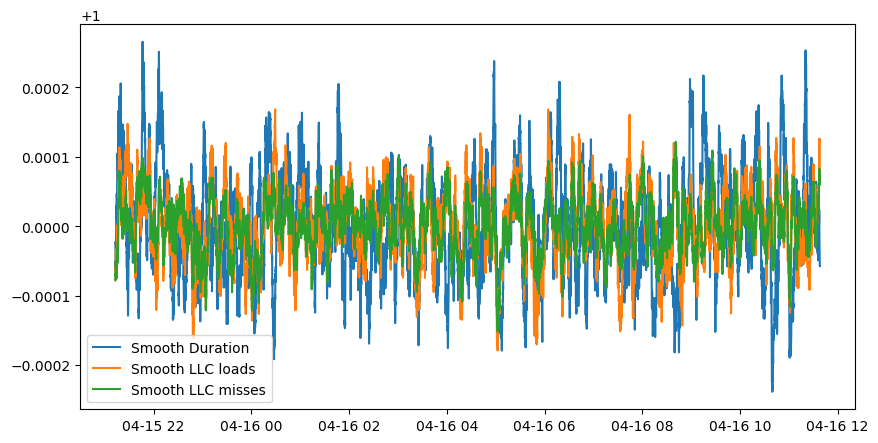

In [188]:
import pandas as pd

fig, ax = plt.subplots()
#ax.plot(timestamps[window_width:], durations[window_width:], linewidth=0.6, label=r"Duration")
ma_vec = np.cumsum(durations)
ma_vec = (ma_vec[window_width:] - ma_vec[:-window_width]) / window_width
ax.plot(timestamps[window_width:], ma_vec, linewidth=1.5, label=r"Smooth Duration")
ma_vec = np.cumsum(llc_loads)
ma_vec = (ma_vec[window_width:] - ma_vec[:-window_width]) / window_width
ax.plot(timestamps[window_width:], ma_vec, linewidth=1.5, label=r"Smooth LLC loads")
ma_vec = np.cumsum(llc_misses)
ma_vec = (ma_vec[window_width:] - ma_vec[:-window_width]) / window_width
ax.plot(timestamps[window_width:], ma_vec, linewidth=1.5, label=r"Smooth LLC misses")
ma_vec = np.cumsum(l1_loads)
ma_vec = (ma_vec[window_width:] - ma_vec[:-window_width]) / window_width
#ax.plot(timestamps[window_width:], ma_vec, linewidth=1.5, label=r"Smooth L1 loads")
ma_vec = np.cumsum(l1_misses)
ma_vec = (ma_vec[window_width:] - ma_vec[:-window_width]) / window_width
#ax.plot(timestamps[window_width:], ma_vec, linewidth=1.5, label=r"Smooth L1 misses")

series = pd.Series(np.log(durations))
rolling_std = np.exp(series.rolling(window=window_width, min_periods=window_width).std()[window_width:])

#for c in [-2, -1, 1, 2]:
#    ax.plot(timestamps[window_width:], ma_vec * rolling_std**c, linewidth=1.5, label=f"Smooth Duration + {c} sigma")


#ma_vec = np.cumsum(llc_loads_r20)
#ma_vec = (ma_vec[window_width:] - ma_vec[:-window_width]) / window_width
#ax.plot(timestamps[window_width:], ma_vec, linewidth=0.5, label=r"LLC loads")
ax.legend(fontsize=10)
plt.show()

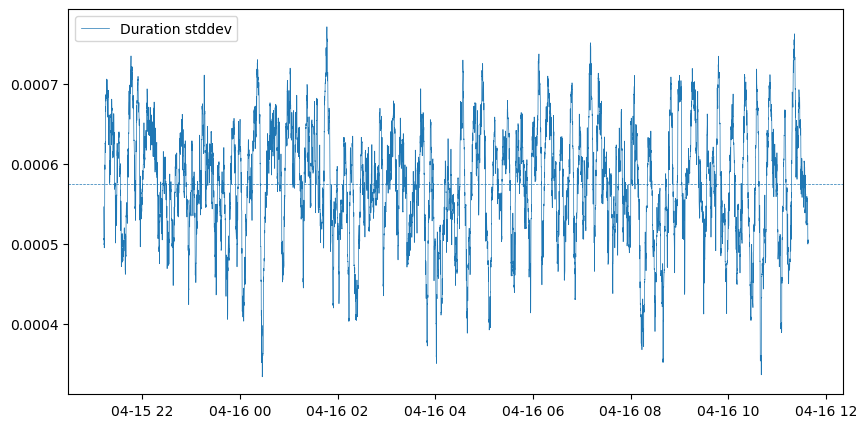

In [189]:
import pandas as pd

series = pd.Series(durations)

rolling_std = series.rolling(window=window_width, min_periods=window_width).std()

fig, ax = plt.subplots()
ax.plot(timestamps, rolling_std, linewidth=0.5, label=r"Duration stddev")
ax.legend(fontsize=10)
#ax.set(ylim=(0,0.0015), ylabel=r"$\sigma$")
ax.axhline(y=np.mean(rolling_std), linewidth=0.5, linestyle='--')
plt.show()

0.0005796267228975668


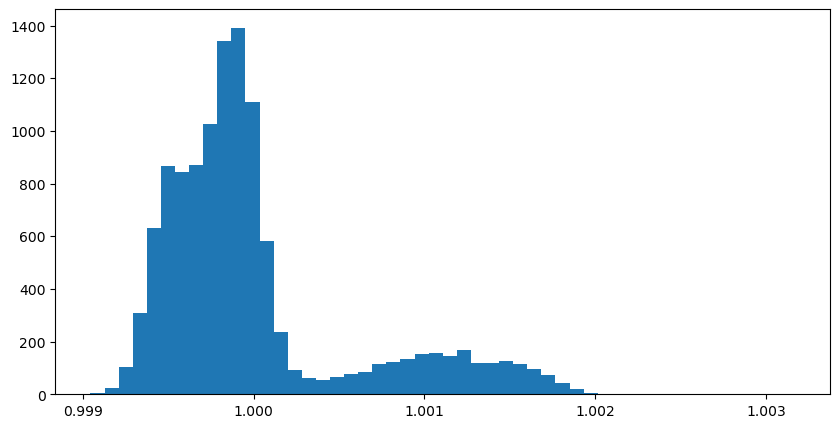

In [194]:
print(np.std(durations))
fig, ax = plt.subplots()
ax.hist(durations, bins=50)
plt.show()